In [ ]:
#Descrption: this program gets BTC's daily simple return
#Aritra Halder 16TH March 2022

In [1]:
#import the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#load the data 
from google.colab import files
files.upload()

Saving BTC-USD (1).csv to BTC-USD (1).csv


{'BTC-USD (1).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-03-16,1251.329956,1257.979980,1152.439941,1187.810059,1187.810059,638568000\n2017-03-17,1180.160034,1180.160034,1099.569946,1100.229980,1100.229980,706598976\n2017-03-18,1099.689941,1114.069946,957.655029,973.817993,973.817993,621302016\n2017-03-19,976.729980,1069.910034,976.729980,1036.739990,1036.739990,406648000\n2017-03-20,1037.239990,1063.030029,1036.680054,1054.229980,1054.229980,286529984\n2017-03-21,1055.359985,1122.430054,1055.359985,1120.540039,1120.540039,337391008\n2017-03-22,1120.650024,1120.650024,1014.210022,1049.140015,1049.140015,380840992\n2017-03-23,1050.050049,1058.010010,1028.930054,1038.589966,1038.589966,248540000\n2017-03-24,1038.449951,1040.469971,934.357971,937.520020,937.520020,491038016\n2017-03-25,936.539978,975.760986,903.713013,972.778992,972.778992,435803008\n2017-03-26,974.015015,1007.960022,954.185974,966.724976,966.724976,303668000\n2017-03-27,972.054993,1046.400024,971.984009,1045.

In [9]:
#store the data
df = pd.read_csv('BTC-USD (1).csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show th data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2017-03-16,2017-03-16,1251.329956,1257.979980,1152.439941,1187.810059,1187.810059,638568000
2017-03-17,2017-03-17,1180.160034,1180.160034,1099.569946,1100.229980,1100.229980,706598976
2017-03-18,2017-03-18,1099.689941,1114.069946,957.655029,973.817993,973.817993,621302016
2017-03-19,2017-03-19,976.729980,1069.910034,976.729980,1036.739990,1036.739990,406648000
2017-03-20,2017-03-20,1037.239990,1063.030029,1036.680054,1054.229980,1054.229980,286529984
...,...,...,...,...,...,...,...
2022-03-12,2022-03-12,38794.464844,39308.597656,38772.535156,38904.011719,38904.011719,14616450657
2022-03-13,2022-03-13,38884.726563,39209.351563,37728.144531,37849.664063,37849.664063,17300745310
2022-03-14,2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,24322159070
2022-03-15,2022-03-15,39664.250000,39794.628906,38310.210938,39338.785156,39338.785156,23934000868


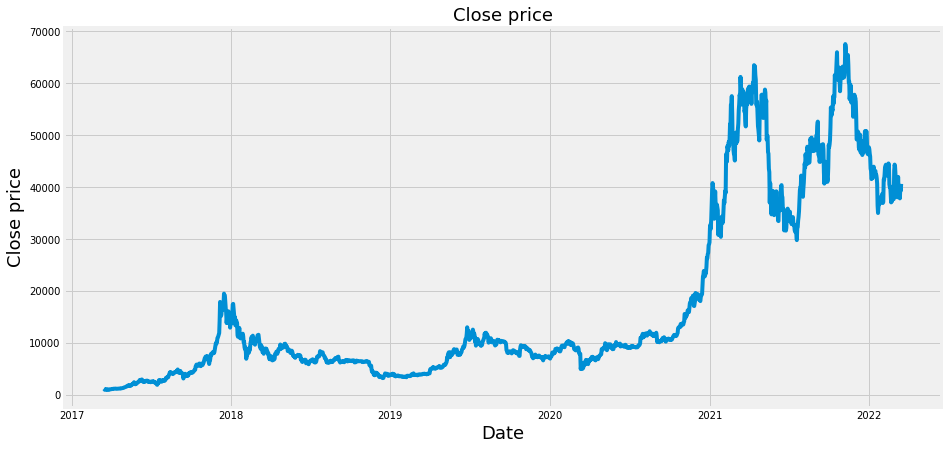

In [13]:
#visually show and plot the close price
plt.figure(figsize=(14,7))
plt.title('Close price',fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price' ,fontsize=18)
plt.show()

In [14]:
#calculate and show the daily simple return(DSR)
DSR=df['Close'].pct_change()
#Show the daily simple return
DSR

2017-03-16         NaN
2017-03-17   -0.073732
2017-03-18   -0.114896
2017-03-19    0.064614
2017-03-20    0.016870
                ...   
2022-03-12    0.002811
2022-03-13   -0.027101
2022-03-14    0.048008
2022-03-15   -0.008268
2022-03-16    0.033029
Name: Close, Length: 1827, dtype: float64

In [16]:
#get some stats on the daily simple return
DSR.describe()

count    1826.000000
mean        0.002821
std         0.041931
min        -0.371695
25%        -0.015937
50%         0.002064
75%         0.021449
max         0.252472
Name: Close, dtype: float64

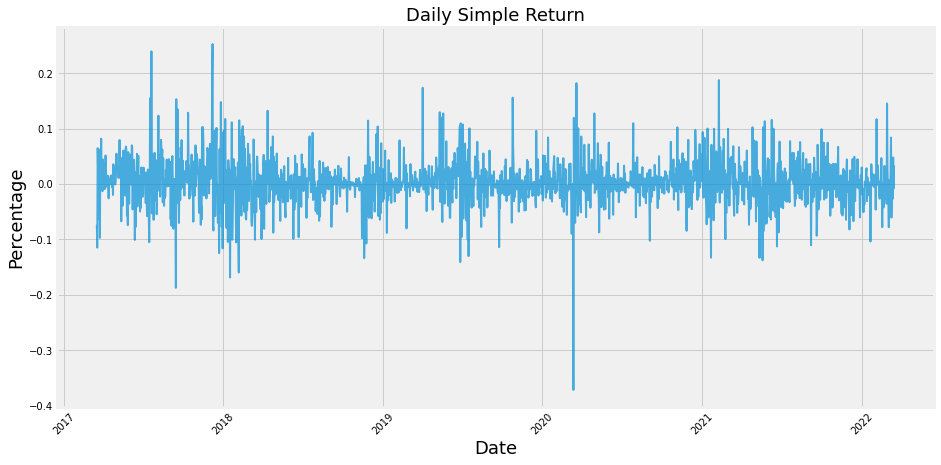

In [17]:
#Visually show and plot the daily simple return
plt.figure(figsize=(14,7))
plt.title('Daily Simple Return',fontsize=18)
plt.plot(DSR.index, DSR, label='DSR', lw=2, alpha=0.7)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Percentage' ,fontsize=18)
plt.xticks(rotation = 45)
plt.show()

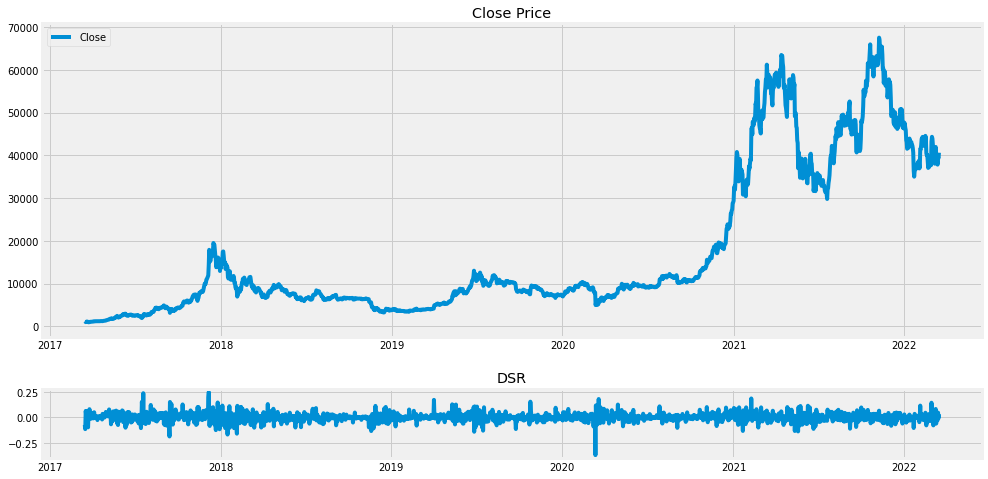

In [20]:
#put the two charts together
#first plot the close price
top = plt.subplot2grid((4,4),(0,0),rowspan=3, colspan=4)
top.plot(df.index, df['Close'], label='Close')
plt.title('Close Price')
plt.legend(loc='upper left')
#plot the DSR
bottom = plt.subplot2grid((4,4),(3,0), rowspan=1, colspan=4)
plt.title('DSR')
bottom.plot(DSR.index, DSR)
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)